# RANSAC

<function matplotlib.pyplot.show(*args, **kw)>

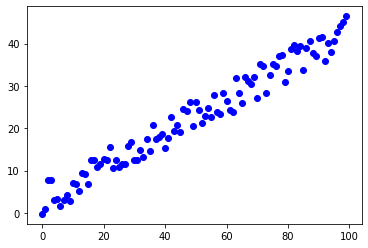

In [2]:
import numpy as np
import matplotlib.pyplot as plt




x = np.arange(100)
delta = np.random.uniform(-4,4, size=(100,))
y = .4 * x +3 + delta


plt.plot(x,y, 'bo')
plt.show

## 2D Line Model

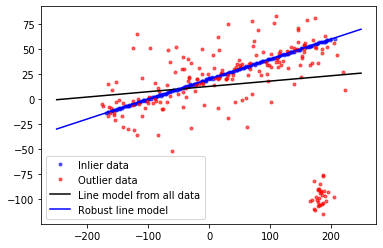

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from skimage.measure import LineModelND, ransac


np.random.seed(seed=1)

# generate coordinates of line
x = np.arange(-200, 200)
y = 0.2 * x + 20
data = np.column_stack([x, y])

# add gaussian noise to coordinates
noise = np.random.normal(size=data.shape)
data += 0.5 * noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]

# add faulty data
faulty = np.array(30 * [(180., -100)])
faulty += 10 * np.random.normal(size=faulty.shape)
data[:faulty.shape[0]] = faulty

# fit line using all data
model = LineModelND()
model.estimate(data)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
        label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
        label='Outlier data')
ax.plot(line_x, line_y, '-k', label='Line model from all data')
ax.plot(line_x, line_y_robust, '-b', label='Robust line model')
ax.legend(loc='lower left')
plt.show()

## 3D Line Model

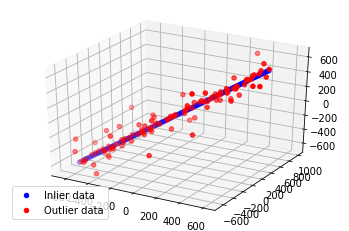

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import LineModelND, ransac

np.random.seed(seed=1)

# generate coordinates of line
point = np.array([0, 0, 0], dtype='float')
direction = np.array([1, 1, 1], dtype='float') / np.sqrt(3)
xyz = point + 10 * np.arange(-100, 100)[..., np.newaxis] * direction

# add gaussian noise to coordinates
noise = np.random.normal(size=xyz.shape)
xyz += 0.5 * noise
xyz[::2] += 20 * noise[::2]
xyz[::4] += 100 * noise[::4]

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(xyz, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[inliers][:, 0], xyz[inliers][:, 1], xyz[inliers][:, 2], c='b',
           marker='o', label='Inlier data')
ax.scatter(xyz[outliers][:, 0], xyz[outliers][:, 1], xyz[outliers][:, 2], c='r',
           marker='o', label='Outlier data')
ax.legend(loc='lower left')
plt.show()